## **<span style="color:red"> - Student Performance Indicator   </span>** 

<br>

### **<span style="color:black"> 1. Problem statement  </span>** 

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

<br>

### **<span style="color:black"> 2. Libraries  </span>** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<br>

### **<span style="color:black"> 3. Data Collection  </span>** 

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [3]:
df = pd.read_csv('data/stud.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>

### **<span style="color:black"> 4. Data Exploration  </span>** 


###### **i. Shape & Category**

In [4]:
## Shape of the Dataset
print('Dataset shape :', df.shape)

## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features :', len(num_features))

##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features :', len(cat_features))

## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Number of Discrete Features :',len(discrete_features))

## Continuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Number of Continuous Features :',len(continuous_features))

Dataset shape : (1000, 8)
Number of Numerical Features : 3
Number of Categorical Features : 5
Number of Discrete Features : 0
Number of Continuous Features : 3


###### **ii. Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


###### **iii. Unique**

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
print( df['gender'].unique() )
print( df['race_ethnicity'].unique() )
print( df['parental_level_of_education'].unique() )
print( df['lunch'].unique() )
print( df['test_preparation_course'].unique() )
          

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


###### **ii. describe**

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

<br>

### **<span style="color:black"> 5. Data Cleaning  </span>** 


###### **i. NULL values**

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no NULL values in the dataset.

<br>

###### **ii. Duplicates**

In [14]:
df.duplicated().sum()

np.int64(0)

There are no Duplicate values in the dataset.

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>

### **<span style="color:black"> 6. Feature Engineering  </span>** 


###### **i. Adding columns**

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

<br>

### **<span style="color:black"> 7. EDA (Visualization)  </span>** 


<br>

##### **i. Histogram & KDE**

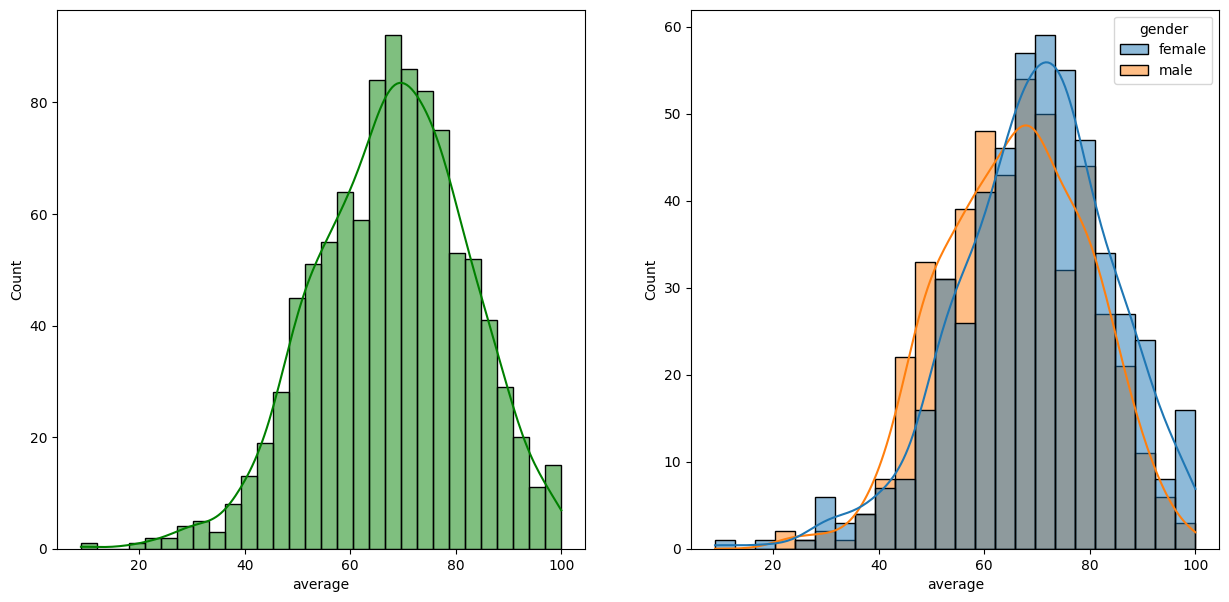

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

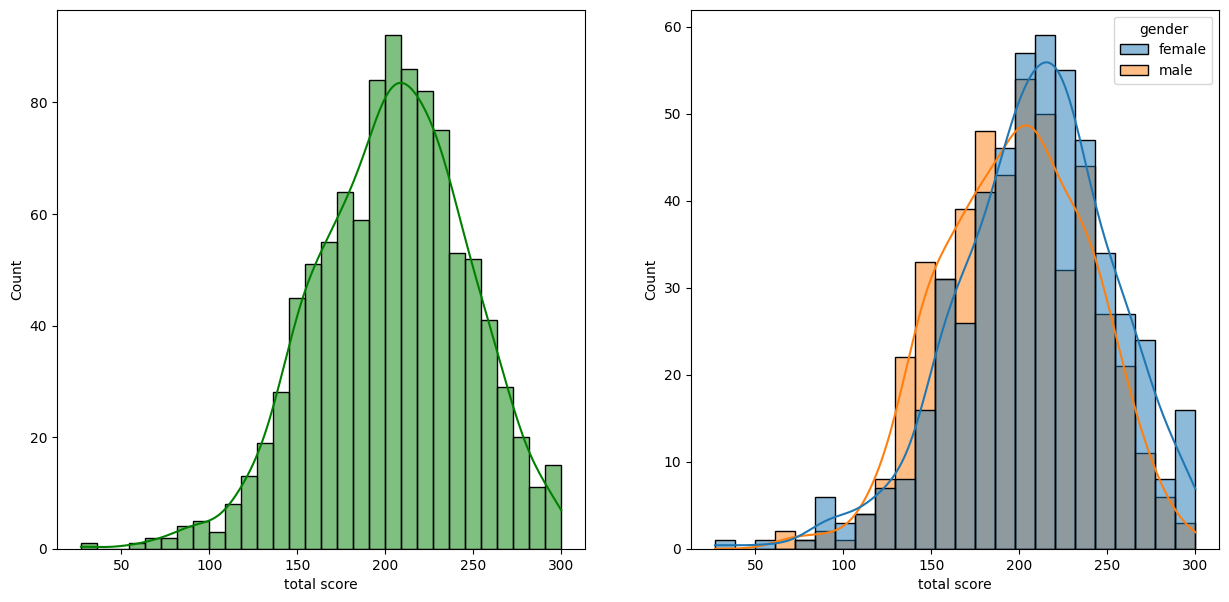

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights
- Female students tend to perform well then male students.

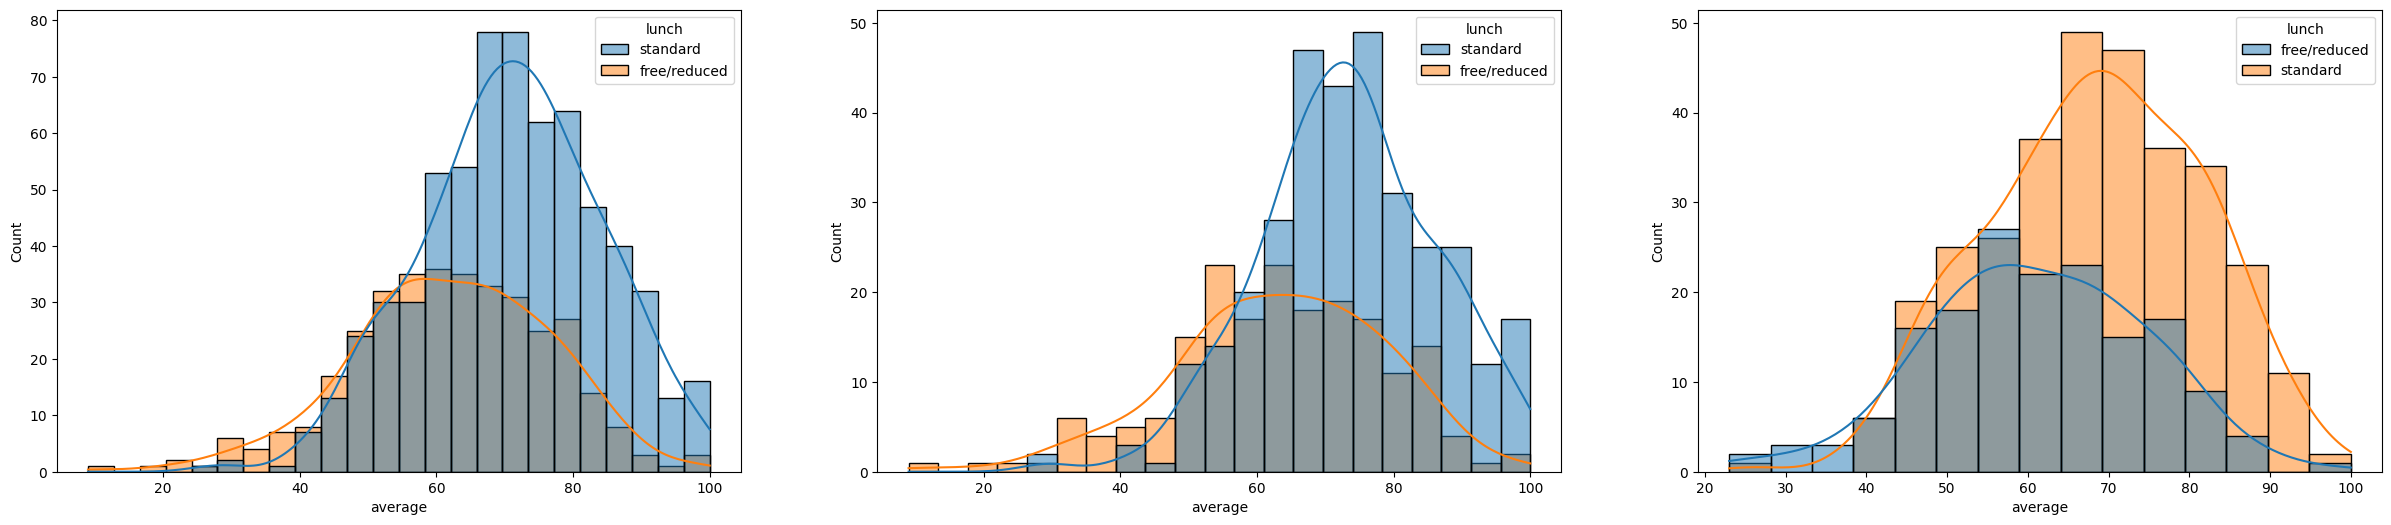

In [28]:
plt.subplots(1,3,figsize=(30,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

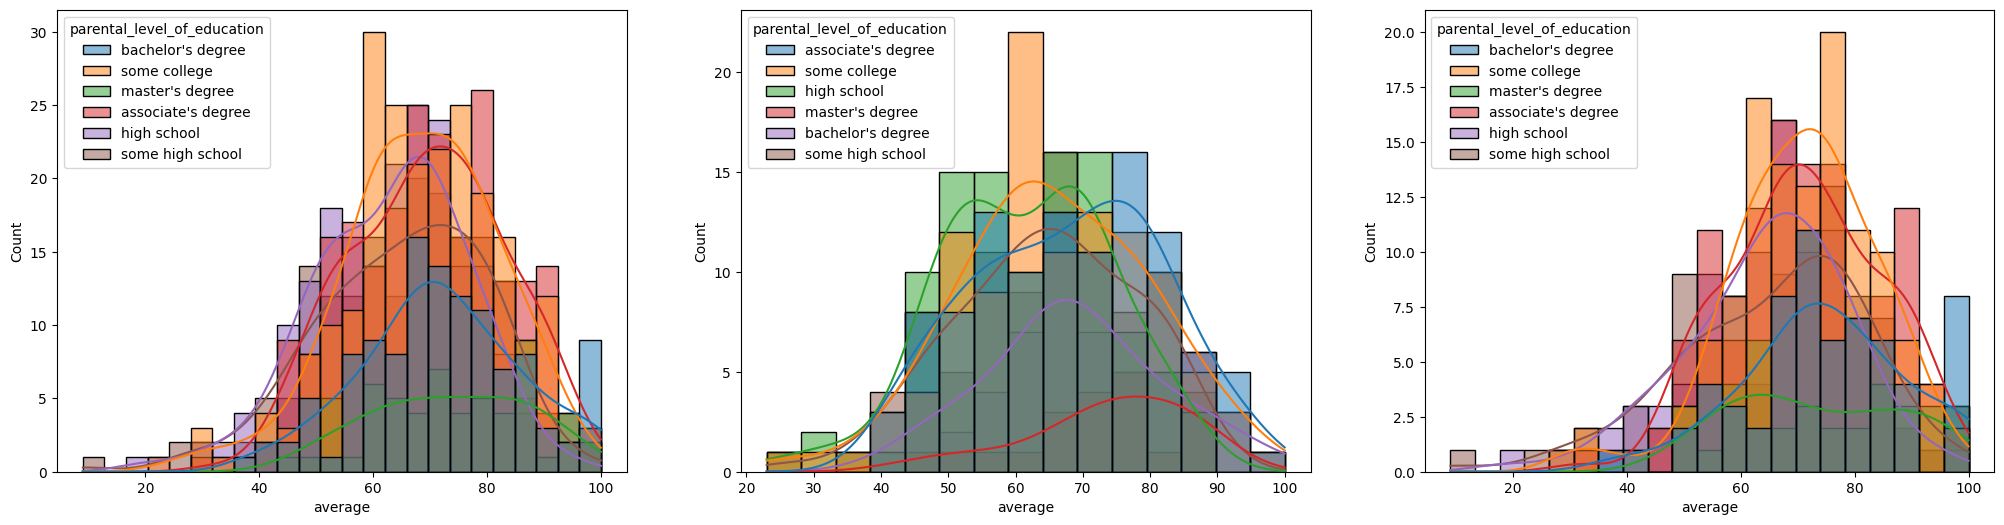

In [31]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

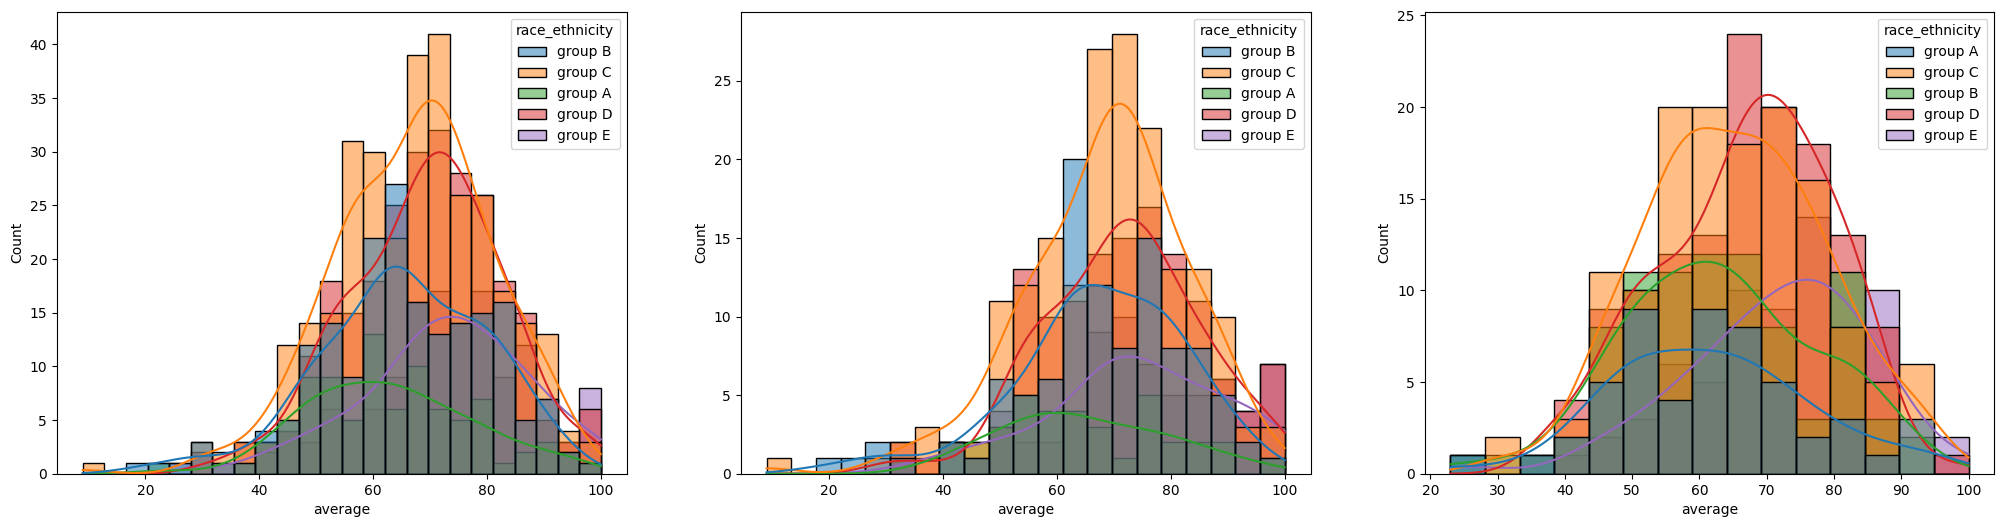

In [34]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<br>

##### **ii. Multivariate analysis**

<br>

###### **I. Using Pie plot**

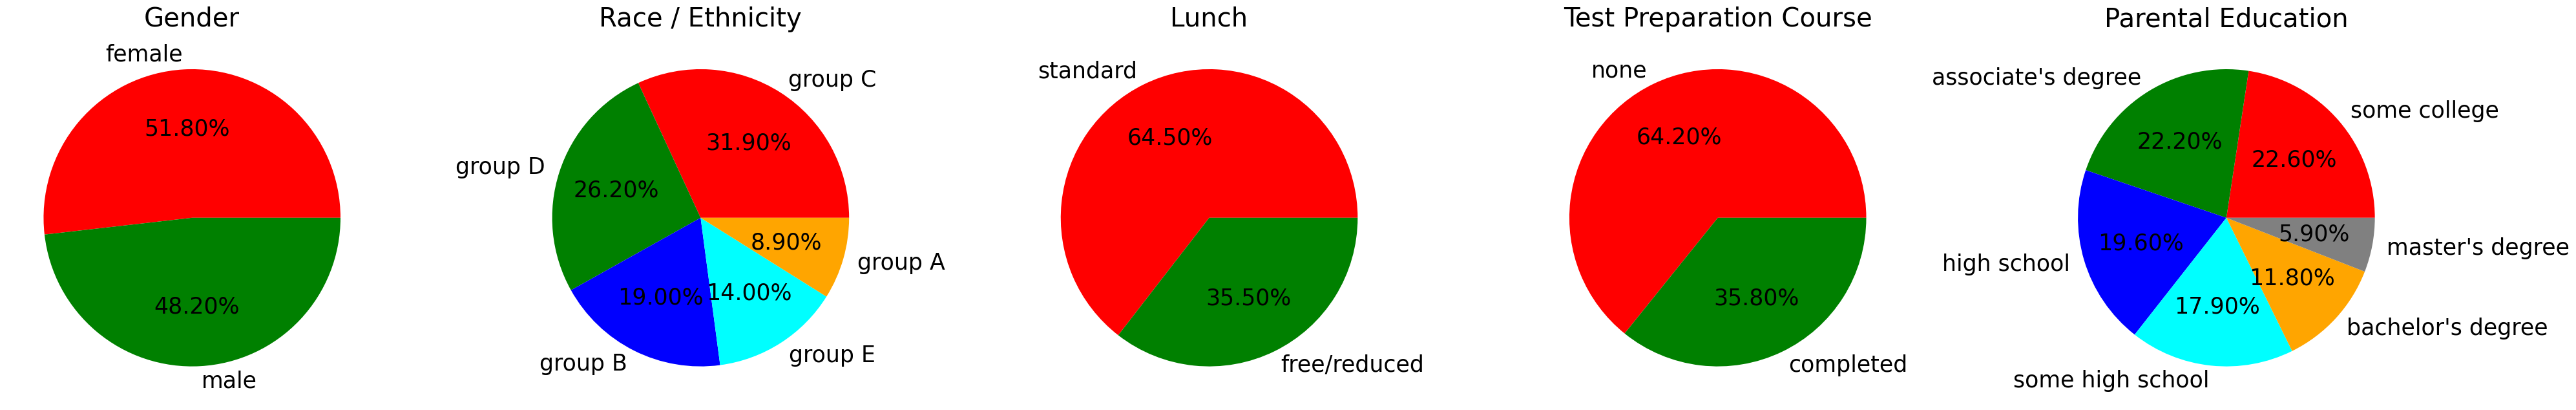

In [69]:
plt.rcParams['figure.figsize'] = (40, 18)

# 1. Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
plt.pie(size, labels=size.index, autopct='%.2f%%',textprops={'fontsize': 25}, colors=['red', 'green'])
plt.title('Gender', fontsize=29)
plt.axis('off')

# 2. Race / Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
plt.pie(size, labels=size.index, autopct='%.2f%%',textprops={'fontsize': 25}, colors=['red', 'green', 'blue', 'cyan', 'orange'])
plt.title('Race / Ethnicity', fontsize=29)
plt.axis('off')

# 3. Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
plt.pie(size, labels=size.index, autopct='%.2f%%',textprops={'fontsize': 25}, colors=['red', 'green'])
plt.title('Lunch', fontsize=29)
plt.axis('off')

# 4. Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
plt.pie(size, labels=size.index, autopct='%.2f%%',textprops={'fontsize': 25}, colors=['red', 'green'])
plt.title('Test Preparation Course', fontsize=29)
plt.axis('off')

# 5. Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
plt.pie(size, labels=size.index, autopct='%.2f%%',textprops={'fontsize': 25}, colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'])
plt.title('Parental Education', fontsize=29)
plt.axis('off')

plt.tight_layout()
plt.show()


Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<br>

###### **II. Using Pairplot**

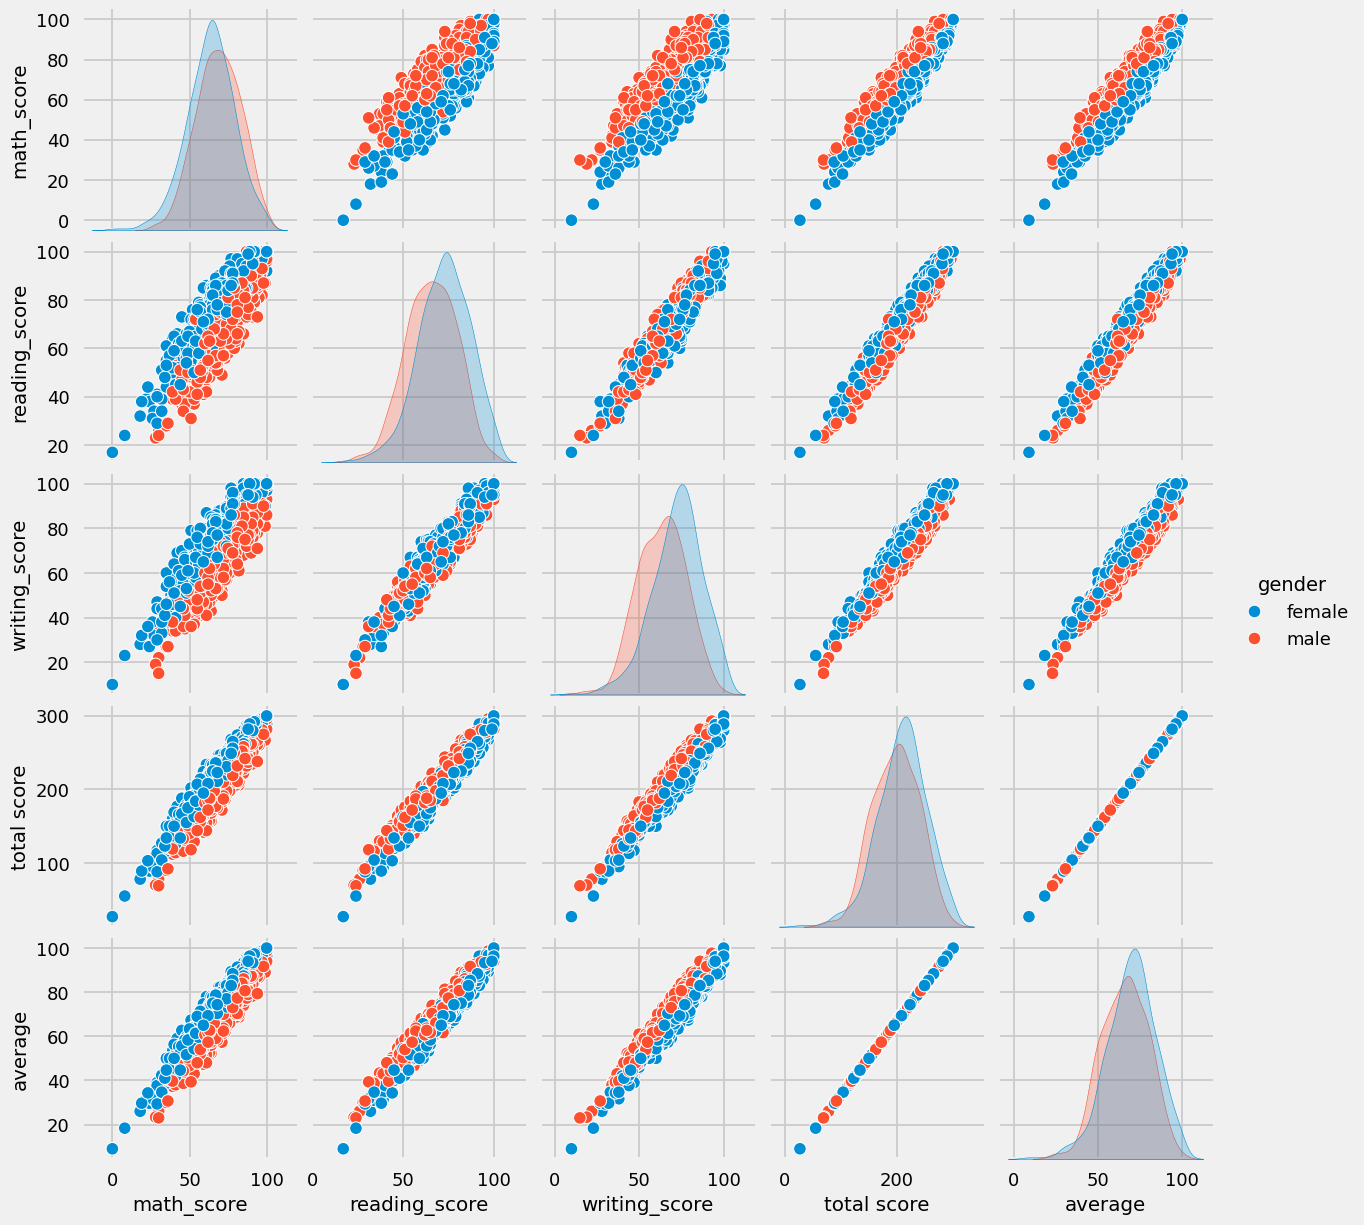

In [211]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

<br>

##### **iii. Feature Wise Visualization**

<br>

###### **I. GENDER COLUMN**

-Univariate analysis

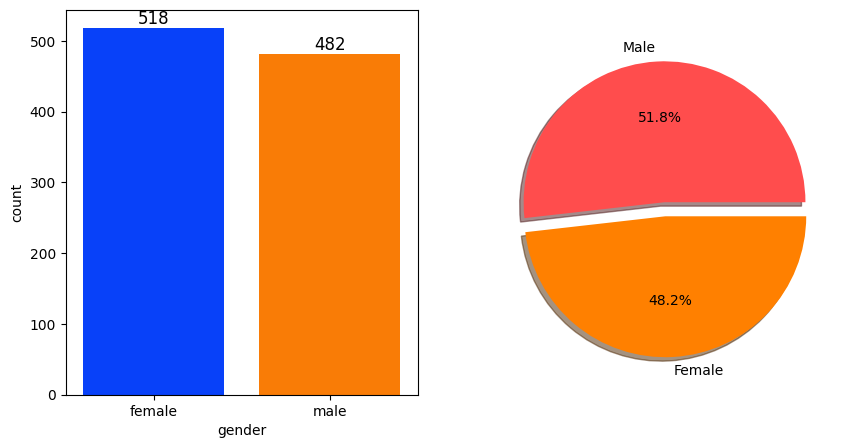

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

<br>

-Bivariate analysis

Is gender has any impact on student's performance ?

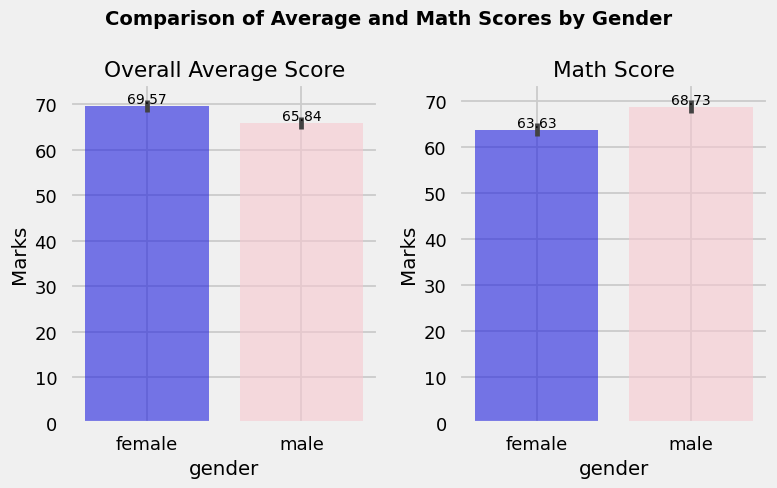

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

sns.barplot(data=df, x='gender', y='average',palette=['blue', 'pink'], alpha=0.6, ax=ax[0])
ax[0].set_title('Overall Average Score')
ax[0].set_ylabel('Marks')
ax[0].grid(True)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.2f', fontsize=10, color='black')

sns.barplot(data=df, x='gender', y='math_score',palette=['blue', 'pink'],  alpha=0.6, ax=ax[1])
ax[1].set_title('Math Score')
ax[1].set_ylabel('Marks')
ax[1].grid(True)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.2f', fontsize=10, color='black')


fig.suptitle('Comparison of Average and Math Scores by Gender',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

<br>

###### **II. RACE/EHNICITY COLUMN**

-UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

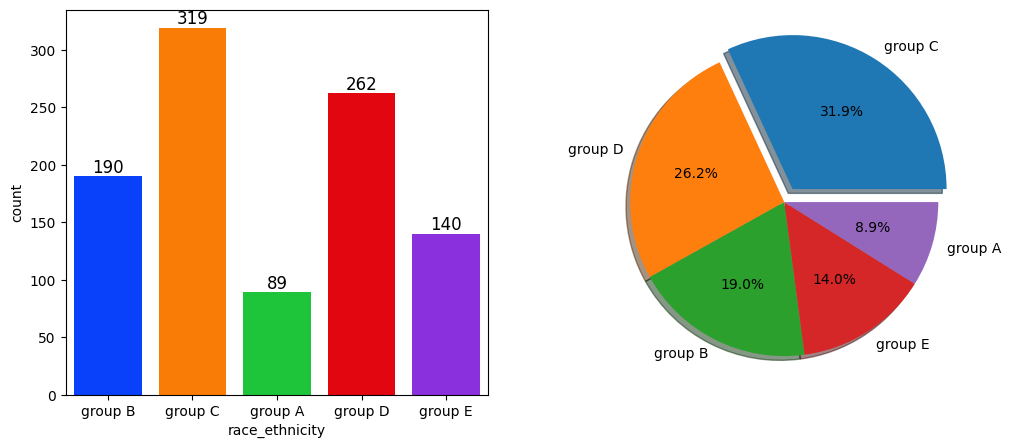

In [141]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

<br>

-BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

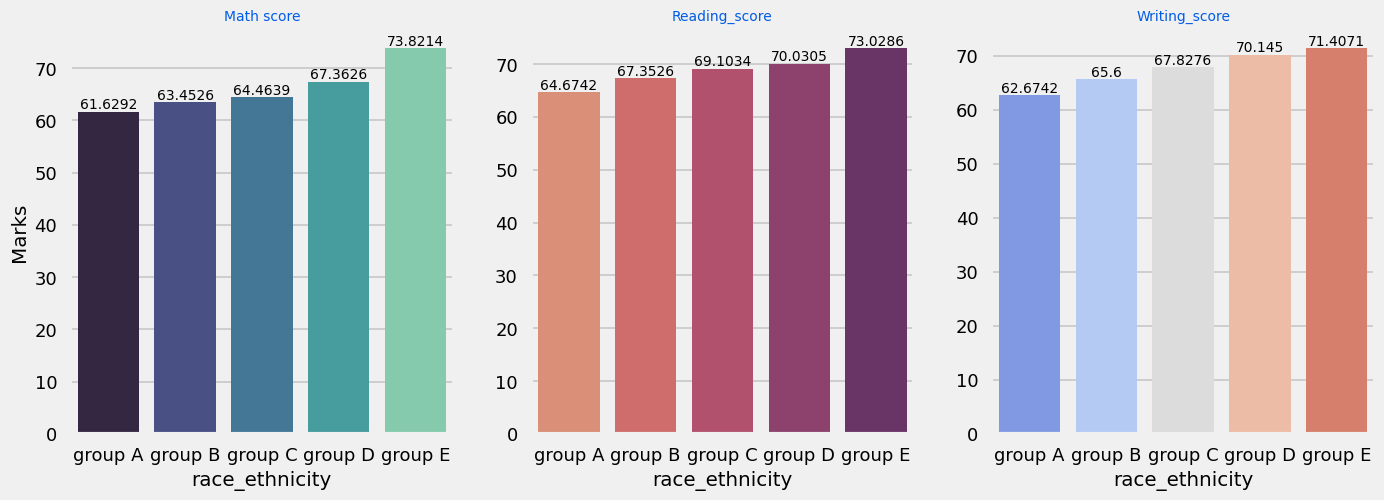

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(15,5))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=10)
ax[0].set_ylabel('Marks')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)


sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=10)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)


sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=10)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)

Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

<br>

###### **III. PARENTAL LEVEL OF EDUCATION COLUMN**

-UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

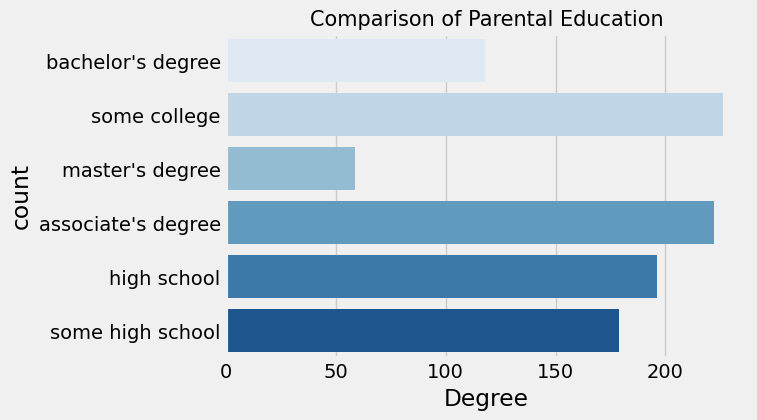

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'], palette = 'Blues')

plt.title('Comparison of Parental Education', fontweight = 20, fontsize = 15)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

Insights 
- Largest number of parents are from some college.

<br>

-BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

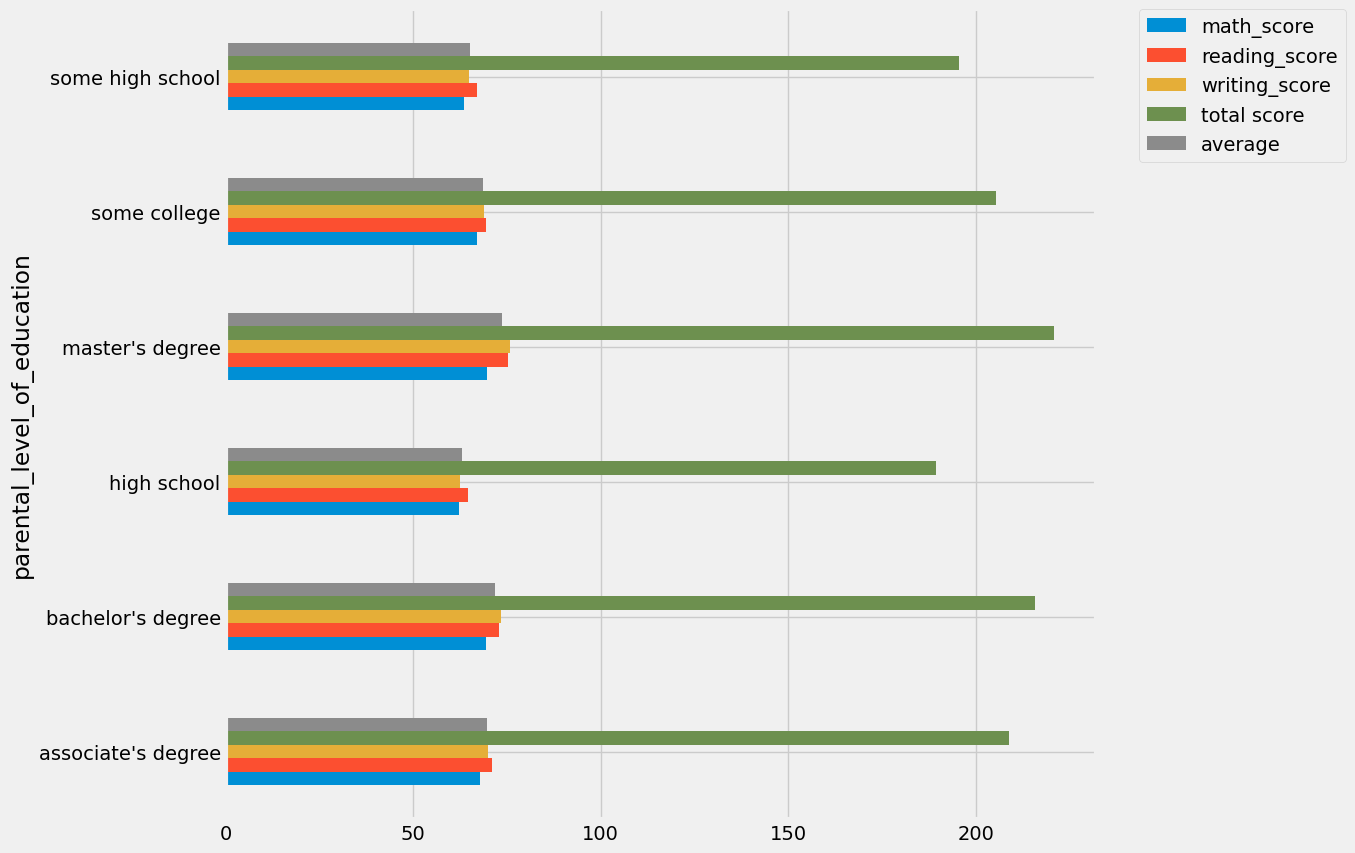

In [180]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

<br>

###### **IV. LUNCH COLUMN**

-UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

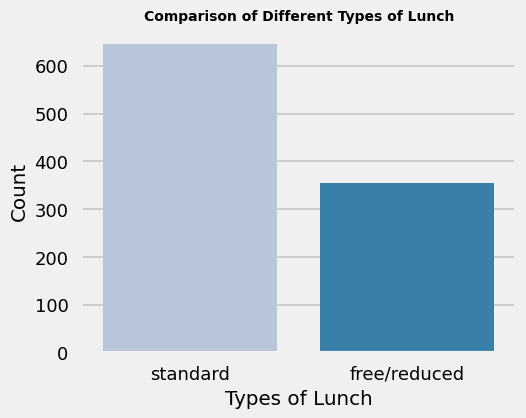

In [192]:
plt.figure(figsize=(5, 4))  

sns.countplot(x='lunch', data=df, palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontsize=10, fontweight='bold')
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


Insights 
- Students being served Standard lunch was more than free lunch

<br>

-BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [199]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


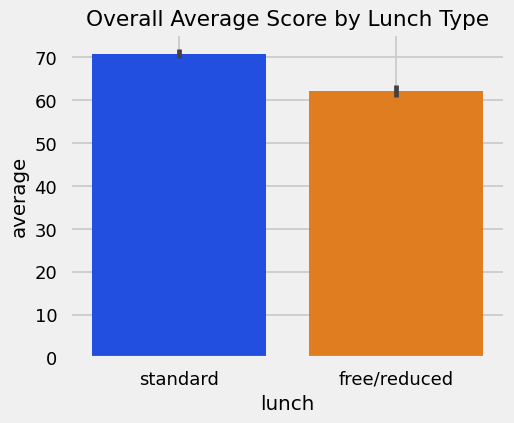

In [205]:
plt.figure(figsize=(5, 4))
sns.barplot(x='lunch', y='average', data=df, palette='bright')
plt.title('Overall Average Score by Lunch Type')
plt.grid(True)
plt.show()

Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<br>

##### **iv. CHECKING OUTLIERS**

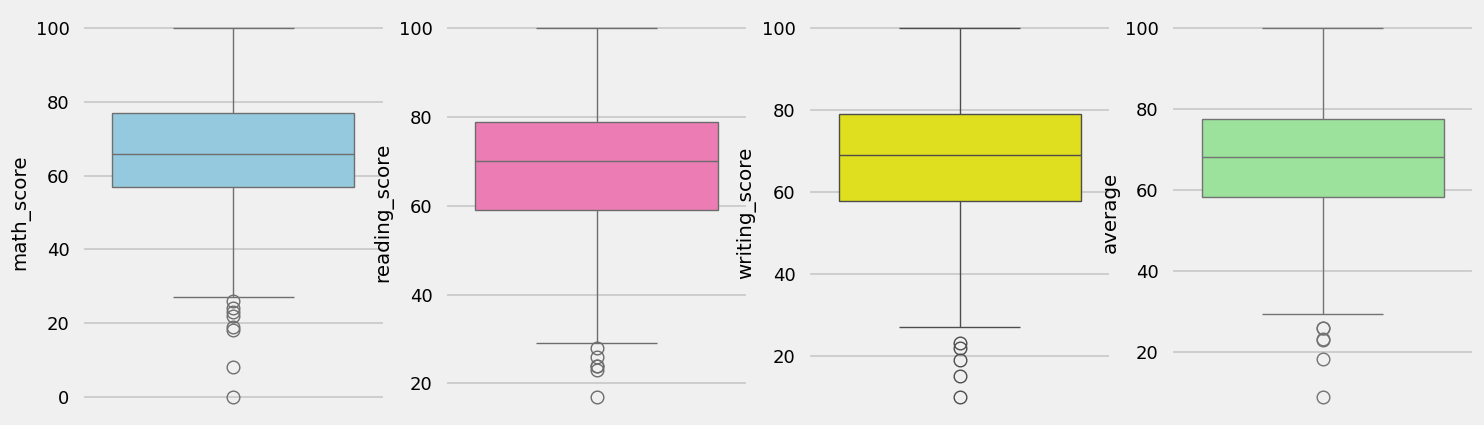

In [209]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')

plt.show()

<br>

### **<span style="color:black"> 8. Conclusion  </span>** 


- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.